<a href="https://colab.research.google.com/github/juanqoss95/ttechReto2/blob/main/jp_Probador2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# proyecto Final - TalentoTech
## Modelo para la prediccion de proyectos de energia renobvable en los municipios de Colombia

_El proyecto fue realizado en el marco del curso de Machine Learning TalentoTech_

## Descripcion 🚀

_Este proyecto utiliza Python y Jupyter Notebook, pandas, numpy para el desarrollo del modelo de predicción de proyectos de energia renobable en los municipios de Colombia._


### Tecnologias utilizdas 📗
_Se utilizan las siguientes tecnologias para el desarrollo del proyecto:_



* [ Python ](https://www.python.org/) -- <img height="20" src="https://cdn.simpleicons.org/python?viewbox=auto" />
* [Jupyter](https://jupyter.org/) -- <img height="20" src="https://cdn.simpleicons.org/jupyter?viewbox=auto" />
* [Pandas](https://pandas.pydata.org/) -- <img height="20" src="https://cdn.simpleicons.org/pandas?viewbox=auto" />
* [Numpy](https://numpy.org/) -- <img height="20" src="https://cdn.simpleicons.org/numpy?viewbox=auto" />
* [Scikit-learn](https://scikit-learn.org/stable/) -- <img height="20" src="https://cdn.simpleicons.org/scikit_learn?viewbox=auto" />
* [github](https://github.com) --<img height="20" src="https://cdn.simpleicons.org/github?viewbox=auto" />


## Autores 😊


* **Monica Garcia**
* **Juan Pablo Cardenas....**
* **Juan Pablo Quevedo....**
* **Hildebrando Vargas**
* **Jonathan Gutierrez**
* **Mary Luz Ceballosl**



## Tareas  ✒️

 1. Importar librerías necesarias[1]
 2. Cargar los Datos
 3. Explore y visualice los datos para obtener información.
 4. Prepare los datos para los algoritmos de machine learning.
 5. Generación de Estadísticas Descriptivas
 6. Visualización de datos utilizando gráficos de barras, histogramas y gráficos de dispersión
 7. Identificación y manejo de valores atípicos y tendencias en los datos
 8. Uso de técnicas como imputación de la media, mediana y regresión para completar datos faltantes.
 9. Eliminación de registros con datos faltantes o imputación de valores categóricos.
 10. Cálculo de la correlación entre variables.
 11. Aplicación de técnicas de reducción de dimensionalidad para reducir la dimensionalidad de los datos.
 12. Aplicación de PCA para reducir la dimensionalidad de datasets
 13. Aplicación de técnicas de regresión para predecir valores de variables.
 14. Ajusta tu modelo.
 15. Presente su solución.
 16. Inicie, supervise y mantenga su sistema.

## Preguntas
### 1) ¿Qué municipios son más aptos para desarrollar un proyecto de energías renovables?
### 2)  Cual es la probabilidad de que un municipio de colombia se desarrolle un proyectoe energia renovable?

# 1. Importar librerías necesarias[1]

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [3]:
!pip install sodapy

In [4]:
from sodapy import Socrata

In [5]:
client = Socrata("www.datos.gov.co", None)

# 2. Cargar los Datos

* Dataframe 1- Estado de la prestación del servicio de energía en Zonas No Interconectadas\
[enlace](https://www.datos.gov.co/Minas-y-Energ-a/Estado-de-la-prestaci-n-del-servicio-de-energ-a-en/3ebi-d83g/about_data)

In [6]:
results1 = client.get("3ebi-d83g", limit=5000)

In [7]:
datos1 = pd.DataFrame.from_records(results1)
datos1.head()

,id_dpto,dpto,id_mpio,mpio,id_localidad,localidad,anio,mes,energia_activa,energia_reactiva,potencia_maxima,dia_demanda_maxima,fecha_demanda_maxima,prom_diario_horas
0,91,AMAZONAS,91540,PUERTO NARIÑO,91540000,PUERTO NARIÑO (PUERTO NARIÑO - AMAZONAS),2024,05,132215,41907,286.4,Jueves,2024-05-23T18:00:00.000,24
1,91,AMAZONAS,91798,TARAPACA (ANM),91798000,TARAPACA (TARAPACA (ANM) - AMAZONAS),2024,05,28132,12662,102.6,Viernes,2024-05-03T18:30:00.000,10.16
2,5,ANTIOQUIA,5873,VIGÍA DEL FUERTE,5873010,LA PLAYA MURRI (VIGÍA DEL FUERTE - ANTIOQUIA),2024,05,2686,1110,27.46,Martes,2024-05-21T19:45:00.000,4.19
3,88,ARCHIPIÉLAGO DE SAN ANDRÉS y PROVIDENCIA,88564,PROVIDENCIA,88564000,PROVIDENCIA (PROVIDENCIA - ARCHIPIÉLAGO DE SAN...,2024,05,1331271,284638,2190.28,Viernes,2024-05-10T15:00:00.000,23.59
4,13,BOLÍVAR,13001,CARTAGENA DE INDIAS,13001007,ISLA FUERTE (CARTAGENA DE INDIAS - BOLÍVAR),2024,05,64368,30561,247.59,Sábado,2024-05-18T22:00:00.000,10.9


In [8]:
#Analisis dataframe
datos1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4273 entries, 0 to 4272
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id_dpto               4273 non-null   object
 1   dpto                  4273 non-null   object
 2   id_mpio               4273 non-null   object
 3   mpio                  4273 non-null   object
 4   id_localidad          4273 non-null   object
 5   localidad             4273 non-null   object
 6   anio                  4273 non-null   object
 7   mes                   4273 non-null   object
 8   energia_activa        4273 non-null   object
 9   energia_reactiva      4273 non-null   object
 10  potencia_maxima       4273 non-null   object
 11  dia_demanda_maxima    4272 non-null   object
 12  fecha_demanda_maxima  4273 non-null   object
 13  prom_diario_horas     4273 non-null   object
dtypes: object(14)
memory usage: 467.5+ KB


In [11]:
df1 = pd.DataFrame(
    {'municipio': datos1['mpio'],
    'potencia_m': datos1['potencia_maxima'],
    'energia_activa': datos1['energia_activa'],
    'energia_reactiva': datos1['energia_reactiva']
    }
)

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4273 entries, 0 to 4272
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   municipio         4273 non-null   object
 1   potencia_m        4273 non-null   object
 2   energia_activa    4273 non-null   object
 3   energia_reactiva  4273 non-null   object
dtypes: object(4)
memory usage: 133.7+ KB


In [13]:
df1.isnull().sum()

,0
municipio,0
potencia_m,0
energia_activa,0
energia_reactiva,0


In [14]:
#pasa  los datos a numericos
df1['potencia_m'] = pd.to_numeric(df1['potencia_m'], errors='coerce')
df1['energia_activa'] = pd.to_numeric(df1['energia_activa'], errors='coerce')
df1['energia_reactiva'] = pd.to_numeric(df1['energia_reactiva'], errors='coerce')
df1

,municipio,potencia_m,energia_activa,energia_reactiva
0,PUERTO NARIÑO,286.40,132215,41907.0
1,TARAPACA (ANM),102.60,28132,12662.0
2,VIGÍA DEL FUERTE,27.46,2686,1110.0
3,PROVIDENCIA,2190.28,1331271,284638.0
4,CARTAGENA DE INDIAS,247.59,64368,30561.0
...,...,...,...,...
4268,BUENAVENTURA,31.23,7610,3285.0
4269,CARURÚ,87.82,31775,7881.0
4270,MITÚ,3236.71,1590470,387197.0
4271,TARAIRA,136.84,39226,10719.0


In [15]:
energy = df1.groupby('municipio').agg({'potencia_m': 'mean', 'energia_activa': 'mean', 'energia_reactiva': 'mean'}).reset_index()
energy

,municipio,potencia_m,energia_activa,energia_reactiva
0,ACANDI,830.817500,406312.750000,139347.887500
1,ACANDÍ,816.094078,357045.184466,127895.689320
2,ALTO BAUDO,107.021250,41909.750000,14539.250000
3,ALTO BAUDO (PIE DE PATO),108.590000,46705.000000,16143.490000
4,ALTO BAUDÓ,114.050000,47341.000000,15989.000000
...,...,...,...,...
90,UNGUÍA,356.366078,144421.575163,49519.810458
91,URIBIA,235.369333,41456.044444,11364.911111
92,URIBÍA,188.310000,45381.250000,9129.250000
93,VIGIA DEL FUERTE,35.810000,3567.000000,393.350000


In [ ]:
energy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   municipio         95 non-null     object 
 1   potencia_m        95 non-null     float64
 2   energia_activa    95 non-null     float64
 3   energia_reactiva  95 non-null     float64
dtypes: float64(3), object(1)
memory usage: 3.1+ KB


In [19]:
energy['municipio'].value_counts().sum()

95

Media: 1055.4624708172898
Mediana: 113.20821428571428


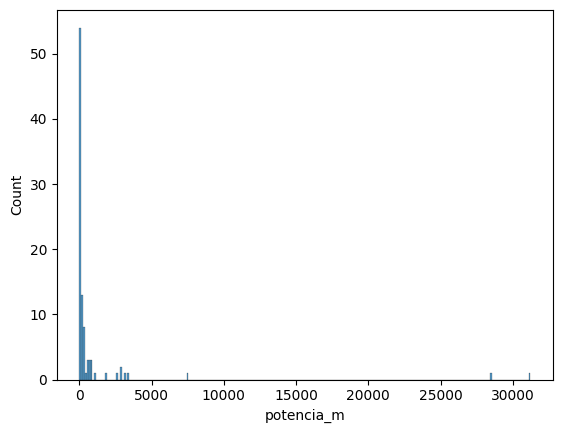

In [20]:
sns.histplot(energy['potencia_m'])
print('Media:', energy['potencia_m'].mean())
print('Mediana:', energy['potencia_m'].median())

Media: 569697.1925745377
Mediana: 34807.13178294573


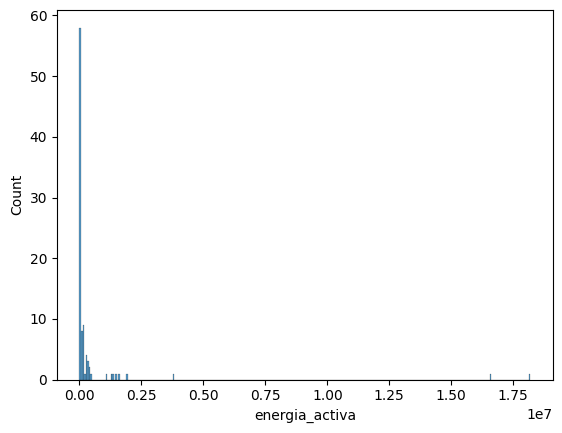

In [21]:
sns.histplot(energy['energia_activa'])
print('Media:', energy['energia_activa'].mean())
print('Mediana:', energy['energia_activa'].median())

Media: 161394.82788102192
Mediana: 10943.466666666667


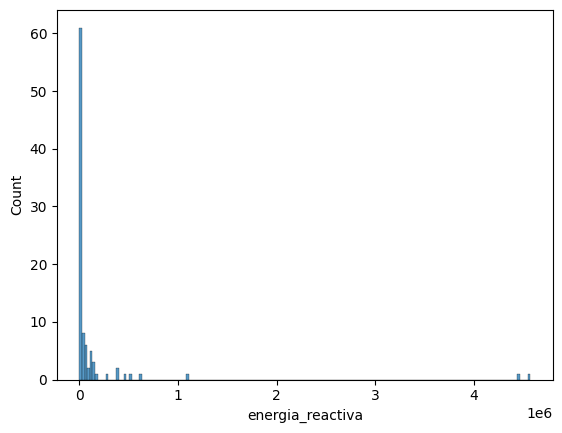

In [22]:
sns.histplot(energy['energia_reactiva'])
print('Media:',energy['energia_reactiva'].mean())
print('Mediana:', energy['energia_reactiva'].median())

<Axes: >

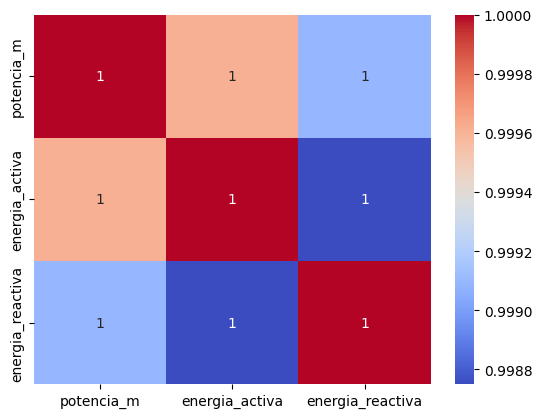

In [24]:
#Analisis de correlacion multivaiada entre las variables de interes. Se muestra una correlacion fuerte.
correlacion1 = energy[['potencia_m', 'energia_activa',	'energia_reactiva']].corr()
sns.heatmap(correlacion1, annot=True, cmap='coolwarm')

{'whiskers': [<matplotlib.lines.Line2D at 0x7e3a66728e20>,
 'caps': [<matplotlib.lines.Line2D at 0x7e3a66729360>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e3a66728b80>],
 'medians': [<matplotlib.lines.Line2D at 0x7e3a667298a0>],
 'fliers': [],
 'means': []}

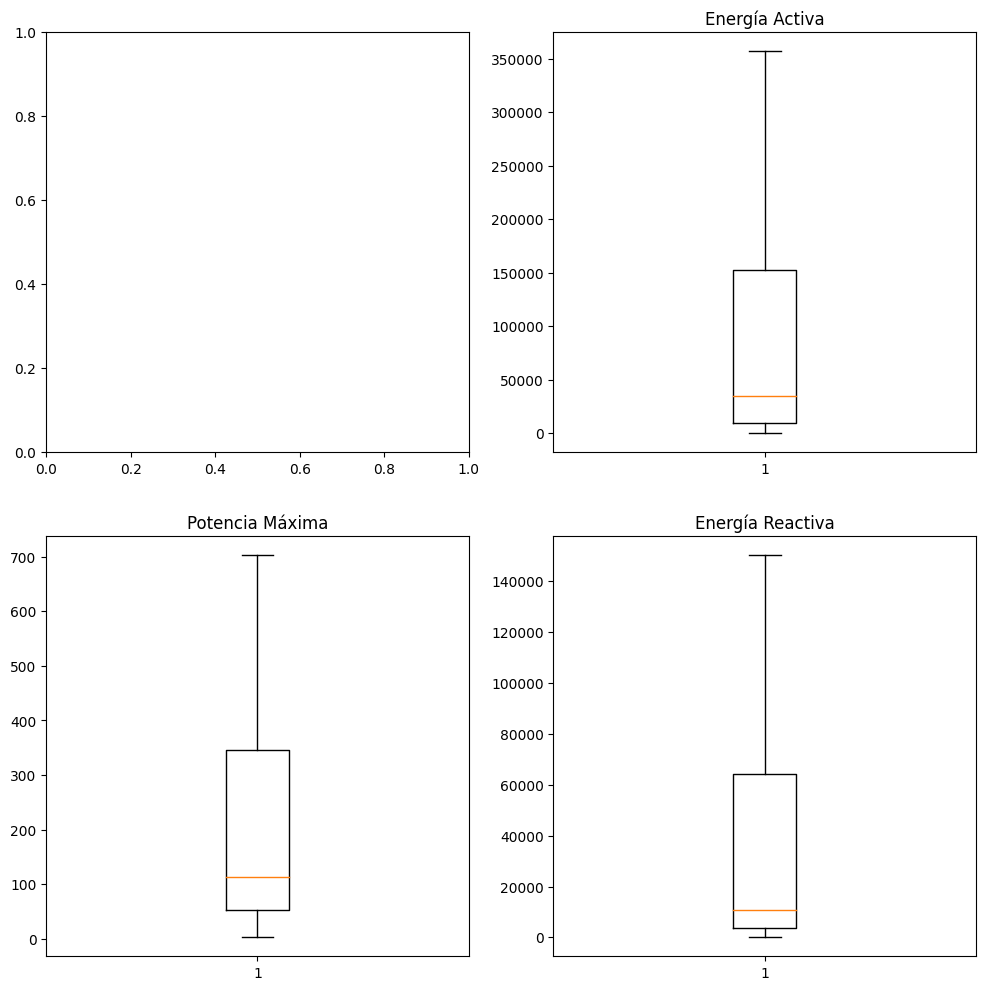

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
#ax[0][0].set_title('Promedio Diaria')
ax[1][0].set_title('Potencia Máxima')
ax[0][1].set_title('Energía Activa')
ax[1][1].set_title('Energía Reactiva')

#boxplots.
#ax[0][0].boxplot(x=df1['prom_diaria'], showfliers=False)
ax[1][0].boxplot(x=energy['potencia_m'], showfliers=False)
ax[0][1].boxplot(x=energy['energia_activa'], showfliers=False)
ax[1][1].boxplot(x=energy['energia_reactiva'], showfliers=False)


* Dataframe 2 - Consumo percapita de energia electrica segun su fuente en Colombia-our world in data energy
[vínculo](https://github.com/owid/energy-data/blob/master/owid-energy-codebook.csv)


* Dataframe 3 -  FNCER: Incorporar en la matriz energética nueva capacidad instalada a partir de Fuentes No Convencionales de Energía Renovable - FNCER\
[vínculo](https://www.datos.gov.co/Minas-y-Energ-a/Meta-FNCER-Incorporar-en-la-matriz-energ-tica-nuev/vy9n-w6hc/about_data)

In [ ]:
#datos2['tipo'].describe()

In [ ]:
#datos2.info()

In [ ]:
'''df2 = pd.DataFrame(
    {'municipio': datos2['municipio'],
     #'capacidad': datos2['capacidad'],
     'proyectos_existentes': datos2['tipo'],
     #'usuarios': datos2['usuarios'],
     #'energía': datos2['energia_kwh_d_a'],
     #'emisiones': datos2['emisiones_co2_ton_a_o'],
     #'inversion': datos2['inversi_n_estimada_cop']
    }
)'''


"df2 = pd.DataFrame(\n    {'municipio': datos2['municipio'],\n     #'capacidad': datos2['capacidad'],\n     'proyectos_existentes': datos2['tipo'],\n     #'usuarios': datos2['usuarios'],\n     #'energía': datos2['energia_kwh_d_a'],\n     #'emisiones': datos2['emisiones_co2_ton_a_o'],\n     #'inversion': datos2['inversi_n_estimada_cop']\n    }\n)"

In [ ]:
'''df2.shape'''

'df2.shape'

In [ ]:
#df2.value_counts()

* Dataframe 3 -  Velocidad del viento en los municipios de colombia
[vínculo](https://www.datos.gov.co/Ambiente-y-Desarrollo-Sostenible/Velocidad-Viento/sgfv-3yp8/about_data)

In [25]:
results3 = client.get("sgfv-3yp8", limit=3000)

In [26]:
datos3 = pd.DataFrame.from_records(results3)
datos3

,codigoestacion,codigosensor,fechaobservacion,valorobservado,nombreestacion,departamento,municipio,zonahidrografica,latitud,longitud,descripcionsensor,unidadmedida
0,0023085260,0103,2014-08-28T15:30:00.000,1.6,LA SELVA - AUT,ANTIOQUIA,RIONEGRO,MEDIO MAGDALENA,6.131916667,-75.41455556,Velocidad Viento (10 min),m/s
1,0016035501,0103,2017-08-23T10:45:00.000,3.244683,SARDINATA - AUT,NORTE DE SANTANDER,SARDINATA,CATATUMBO,8.151169444,-72.86776667,Velocidad Viento (10 min),m/s
2,0028045501,0103,2017-05-13T08:20:00.000,0,PUEBLO BELLO - AUT,CESAR,PUEBLO BELLO,CESAR,10.42166667,-73.57471944,Velocidad Viento (10 min),m/s
3,0021045501,0103,2018-08-26T04:15:00.000,2.415903,OPORAPA - AUT,HUILA,OPORAPA,ALTO MAGDALENA,2.041941667,-76.01191667,Velocidad Viento (10 min),m/s
4,0056010040,0103,2018-11-06T04:30:00.000,0.8,PR CHOCO: NUQUI,CHOCÓ,NUQUÍ,PACÍFICO - DIRECTOS,5.708,-77.266,Velocidad Viento (10 min),m/s
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0023195190,0103,2005-08-07T18:50:00.000,3.4,SAN ANTONIO,SANTANDER,FLORIDABLANCA,MEDIO MAGDALENA,7.1,-73.066,Velocidad Viento (10 min),m/s
2996,0027015320,0103,2018-03-23T00:40:00.000,0.8,ARAGON - AUT,ANTIOQUIA,SANTA ROSA DE OSOS,NECHÍ,6.781083333,-75.560888889,Velocidad Viento (10 min),m/s
2997,0028035060,0103,2016-03-07T10:10:00.000,2.3,FEDEARROZ - AUT,CESAR,VALLEDUPAR,CESAR,10.46361111,-73.24805556,Velocidad Viento (10 min),m/s
2998,0021197430,0103,2009-06-09T22:40:00.000,3.05,PROVIDENCIA - PROVIDENCIA,CUNDINAMARCA,FUSAGASUGÁ,ALTO MAGDALENA,4.367,-74.3,Velocidad Viento (10 min),m/s


In [28]:
df3 = pd.DataFrame(
    {'municipio': datos3['municipio'],
     'velocidad_viento': datos3['valorobservado'],
     "longitud": datos3["longitud"],
     "latitud": datos3["latitud"]
    }
)
df3

,municipio,velocidad_viento,longitud,latitud
0,RIONEGRO,1.6,-75.41455556,6.131916667
1,SARDINATA,3.244683,-72.86776667,8.151169444
2,PUEBLO BELLO,0,-73.57471944,10.42166667
3,OPORAPA,2.415903,-76.01191667,2.041941667
4,NUQUÍ,0.8,-77.266,5.708
...,...,...,...,...
2995,FLORIDABLANCA,3.4,-73.066,7.1
2996,SANTA ROSA DE OSOS,0.8,-75.560888889,6.781083333
2997,VALLEDUPAR,2.3,-73.24805556,10.46361111
2998,FUSAGASUGÁ,3.05,-74.3,4.367


In [29]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   municipio         3000 non-null   object
 1   velocidad_viento  3000 non-null   object
 2   longitud          3000 non-null   object
 3   latitud           3000 non-null   object
dtypes: object(4)
memory usage: 93.9+ KB


In [30]:
df3.isnull().sum()

,0
municipio,0
velocidad_viento,0
longitud,0
latitud,0


In [31]:
#pasar la columna velocidad_viento a numérico
df3['velocidad_viento'] = pd.to_numeric(df3['velocidad_viento'], errors='coerce')

In [32]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   municipio         3000 non-null   object 
 1   velocidad_viento  3000 non-null   float64
 2   longitud          3000 non-null   object 
 3   latitud           3000 non-null   object 
dtypes: float64(1), object(3)
memory usage: 93.9+ KB


In [34]:
viento = df3.groupby('municipio').agg({'velocidad_viento': 'median'}).reset_index()
viento

,municipio,velocidad_viento
0,ABRIAQUÍ,0.40000
1,ACANDÍ,1.10000
2,ACEVEDO,1.72981
3,AGUACHICA,1.30000
4,AGUSTÍN CODAZZI,1.75000
...,...,...
290,YOLOMBÓ,1.50000
291,YOPAL,2.20000
292,ZETAQUIRÁ,1.00000
293,ZIPAQUIRÁ,2.25000


* Dataframe 4 -  Dias con lluvia en los municipios de colombia\
  INFORMACIÓN GENERAL ESTACIONES,,,,,,,,,NORMAL CLIMATOLÓGICA ESTÁNDAR DE No DE DÍAS CON LLUVIA ≥ 1 mm PARA EL PERIODO 1991-2020,,,,,,,,,,,,,  Cumplen la directriz No 1203 del 2017 de la OMM,\
[vínculo](http://archivo.ideam.gov.co/web/tiempo-y-clima/clima)

In [35]:
datos4 = pd.read_csv('https://raw.githubusercontent.com/gluoneros/talentoTech/refs/heads/main/noDiasLLuvia.csv')
datos4

,CODIGO,CATEGORIA,ESTACIÓN,MUNICIPIO,DEPARTAMENTO,AO,ALTITUD (m),LONGITUD,LATITUD,ENE,...,JUN,JUL,AGO,SEP,OCT,NOV,DIC,ANUAL,Número de meses,% de cumplimiento
0,47067010,LM,El Encanto,El Encanto,Amazonas,7,120,"-73,20","-1,77","14,3",...,"18,8","17,7","13,4","13,3","13,9","14,8","16,4","191,7",332,"92,2%"
1,47060010,PM,El Encato,El Encanto,Amazonas,7,120,"-73,21","-1,75","14,3",...,"18,6","17,8","13,1","13,3","13,8","14,9","16,3","191,1",343,"95,3%"
2,44187030,LM,Bacuri,La Pedrera,Amazonas,4,101,"-69,47","-1,23","19,0",...,"20,3","19,6","16,5","14,5","15,1","15,0","18,8","216,0",343,"95,3%"
3,44187020,PM,La Pedrera,La Pedrera,Amazonas,4,102,"-69,59","-1,31","13,8",...,"14,7","13,5","12,4","11,2","12,0","12,1","13,3","161,8",334,"92,8%"
4,44157040,LM,Manacaro,La Pedrera,Amazonas,4,109,"-70,18","-1,53","18,3",...,"19,1","18,0","14,6","13,2","14,9","14,8","17,1","204,0",351,"97,5%"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1440,38015030,SP,Aeropuerto Puerto Carreño,Puerto Carreño,Vichada,3,57,"-67,49","6,18","1,0",...,"21,2","21,9","19,7","14,3","12,3","7,9","2,9","133,2",359,"99,7%"
1441,38017040,LM,Casuarito,Puerto Carreño,Vichada,3,65,"-67,64","5,68","2,1",...,"19,3","19,6","16,1","12,7","10,3","7,7","4,3","130,7",343,"95,3%"
1442,35260010,PM,Bonanza,Santa Rosalía,Vichada,3,112,"-70,85","5,14","1,1",...,"14,4","15,1","13,2","10,0","8,9","5,9","2,7","98,7",324,"90,0%"
1443,35260030,PM,Hato Burrunay,Santa Rosalía,Vichada,3,106,"-70,68","5,35","1,3",...,"15,3","17,1","14,0","12,1","10,8","7,7","3,6","113,4",349,"96,9%"


In [36]:
datos4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CODIGO             1445 non-null   int64 
 1   CATEGORIA          1445 non-null   object
 2   ESTACIÓN           1445 non-null   object
 3   MUNICIPIO          1445 non-null   object
 4   DEPARTAMENTO       1445 non-null   object
 5   AO                 1445 non-null   int64 
 6   ALTITUD (m)        1445 non-null   int64 
 7   LONGITUD           1445 non-null   object
 8   LATITUD            1445 non-null   object
 9   ENE                1445 non-null   object
 10  FEB                1445 non-null   object
 11  MAR                1445 non-null   object
 12  ABR                1445 non-null   object
 13  MAY                1445 non-null   object
 14  JUN                1445 non-null   object
 15  JUL                1445 non-null   object
 16  AGO                1445 non-null   object


In [37]:
df4 = pd.DataFrame(
    {'municipio': datos4['MUNICIPIO'],
     'dias_lluvia': datos4['ANUAL'],
     "longitud": datos4["LONGITUD"],
     "latitud": datos4["LATITUD"]
    }
)
df4

,municipio,dias_lluvia,longitud,latitud
0,El Encanto,"191,7","-73,20","-1,77"
1,El Encanto,"191,1","-73,21","-1,75"
2,La Pedrera,"216,0","-69,47","-1,23"
3,La Pedrera,"161,8","-69,59","-1,31"
4,La Pedrera,"204,0","-70,18","-1,53"
...,...,...,...,...
1440,Puerto Carreño,"133,2","-67,49","6,18"
1441,Puerto Carreño,"130,7","-67,64","5,68"
1442,Santa Rosalía,"98,7","-70,85","5,14"
1443,Santa Rosalía,"113,4","-70,68","5,35"


In [38]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   municipio    1445 non-null   object
 1   dias_lluvia  1445 non-null   object
 2   longitud     1445 non-null   object
 3   latitud      1445 non-null   object
dtypes: object(4)
memory usage: 45.3+ KB


In [39]:
 # elimina espacios en blanco
df4['dias_lluvia'] = df4['dias_lluvia'].str.strip()
df4['municipio'] = df4['municipio'].str.strip()
df4['longitud'] = df4['longitud'].str.strip()
df4['latitud'] = df4['latitud'].str.strip()

In [40]:
 # Cambia comas por puntos en el campo 'dias_lluvia'
df4['dias_lluvia'] = df4['dias_lluvia'].str.replace(',', '.', regex=False)

In [41]:
# conversion a numerico
df4['dias_lluvia'] = pd.to_numeric(df4['dias_lluvia'], errors='coerce')

In [42]:
#pasa municipio a mayusculas
df4['municipio'] = df4['municipio'].str.upper()
df4

,municipio,dias_lluvia,longitud,latitud
0,EL ENCANTO,191.7,"-73,20","-1,77"
1,EL ENCANTO,191.1,"-73,21","-1,75"
2,LA PEDRERA,216.0,"-69,47","-1,23"
3,LA PEDRERA,161.8,"-69,59","-1,31"
4,LA PEDRERA,204.0,"-70,18","-1,53"
...,...,...,...,...
1440,PUERTO CARREÑO,133.2,"-67,49","6,18"
1441,PUERTO CARREÑO,130.7,"-67,64","5,68"
1442,SANTA ROSALÍA,98.7,"-70,85","5,14"
1443,SANTA ROSALÍA,113.4,"-70,68","5,35"


In [43]:
lluvia = df4.groupby('municipio').agg({'dias_lluvia': 'median'}).reset_index() #,'longitud': 'first', 'latitud': 'first'
lluvia

,municipio,dias_lluvia
0,ABEJORRAL,177.80
1,ABRIAQUÍ,200.60
2,ACACÍAS,195.70
3,ACANDÍ,150.50
4,ACEVEDO,157.65
...,...,...
756,ZONA BANANERA,48.05
757,ÁBREGO,106.70
758,ÍQUIRA,166.50
759,ÚMBITA,170.20


Unificar datos de poblaciones y viento

In [44]:
df_clima = pd.merge(left= viento, right= lluvia, left_on='municipio', right_on= 'municipio', how='left')
df_clima

,municipio,velocidad_viento,dias_lluvia
0,ABRIAQUÍ,0.40000,200.60
1,ACANDÍ,1.10000,150.50
2,ACEVEDO,1.72981,157.65
3,AGUACHICA,1.30000,92.60
4,AGUSTÍN CODAZZI,1.75000,77.95
...,...,...,...
290,YOLOMBÓ,1.50000,152.30
291,YOPAL,2.20000,149.60
292,ZETAQUIRÁ,1.00000,179.00
293,ZIPAQUIRÁ,2.25000,147.35


In [46]:
df_climas = pd.DataFrame(
    {'municipio': df_clima['municipio'],
     'velocidad_viento': df_clima['velocidad_viento'],
     'dias_lluvia': df_clima['dias_lluvia'],
    })
df_climas

,municipio,velocidad_viento,dias_lluvia
0,ABRIAQUÍ,0.40000,200.60
1,ACANDÍ,1.10000,150.50
2,ACEVEDO,1.72981,157.65
3,AGUACHICA,1.30000,92.60
4,AGUSTÍN CODAZZI,1.75000,77.95
...,...,...,...
290,YOLOMBÓ,1.50000,152.30
291,YOPAL,2.20000,149.60
292,ZETAQUIRÁ,1.00000,179.00
293,ZIPAQUIRÁ,2.25000,147.35


In [47]:
df_climas.isnull().sum()

,0
municipio,0
velocidad_viento,0
dias_lluvia,75


<Axes: xlabel='dias_lluvia', ylabel='Count'>

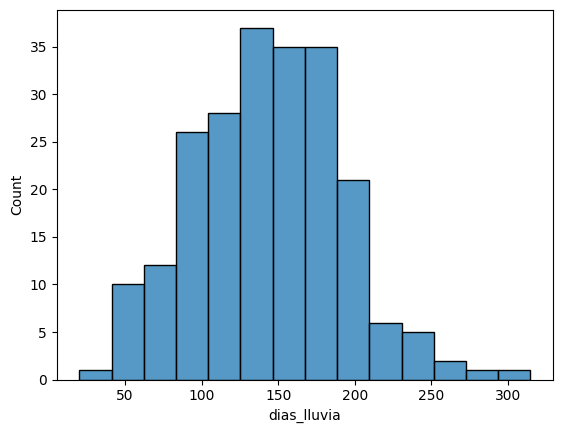

In [48]:
sns.histplot(df_climas['dias_lluvia'])

<Axes: xlabel='velocidad_viento', ylabel='Count'>

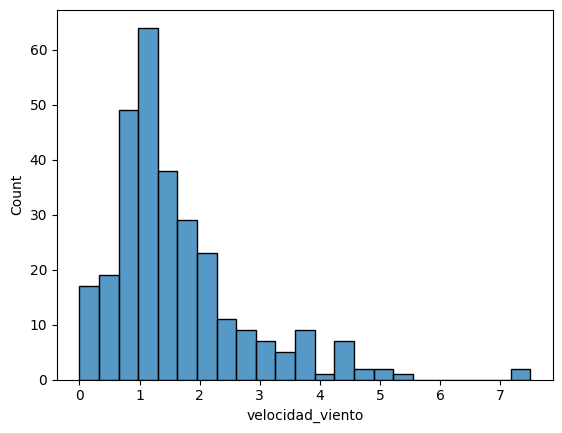

In [49]:
sns.histplot(df_climas['velocidad_viento'])

In [50]:
df_climas['dias_lluvia'] = df_climas['dias_lluvia'].fillna(df_climas['dias_lluvia'].mean())
df_climas

,municipio,velocidad_viento,dias_lluvia
0,ABRIAQUÍ,0.40000,200.60
1,ACANDÍ,1.10000,150.50
2,ACEVEDO,1.72981,157.65
3,AGUACHICA,1.30000,92.60
4,AGUSTÍN CODAZZI,1.75000,77.95
...,...,...,...
290,YOLOMBÓ,1.50000,152.30
291,YOPAL,2.20000,149.60
292,ZETAQUIRÁ,1.00000,179.00
293,ZIPAQUIRÁ,2.25000,147.35


In [51]:
df_climas.isnull().sum()

,0
municipio,0
velocidad_viento,0
dias_lluvia,0


In [52]:
df_climas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   municipio         295 non-null    object 
 1   velocidad_viento  295 non-null    float64
 2   dias_lluvia       295 non-null    float64
dtypes: float64(2), object(1)
memory usage: 7.0+ KB


<Axes: xlabel='municipio', ylabel='Count'>

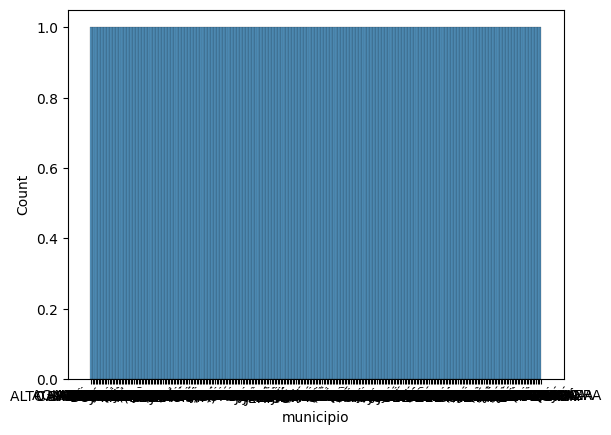

In [53]:
sns.histplot(df_climas['municipio'])

<Axes: >

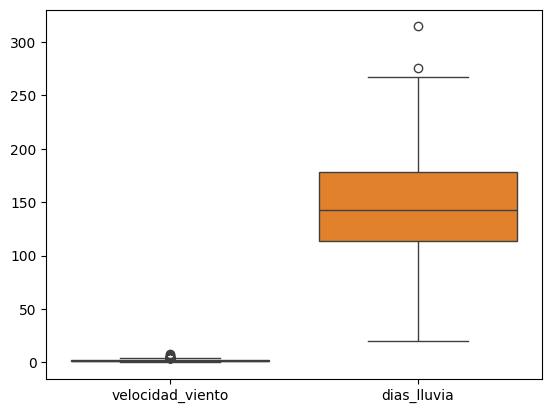

In [54]:
climas = df_clima[['velocidad_viento', 'dias_lluvia']]
sns.boxplot(climas)

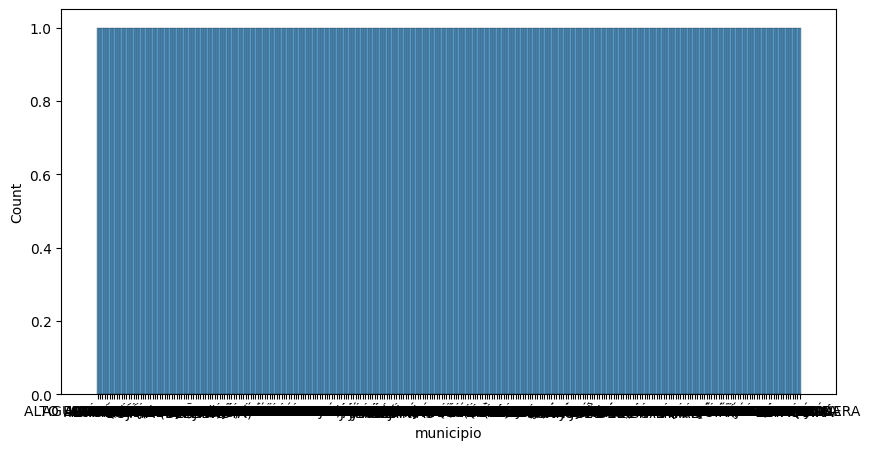

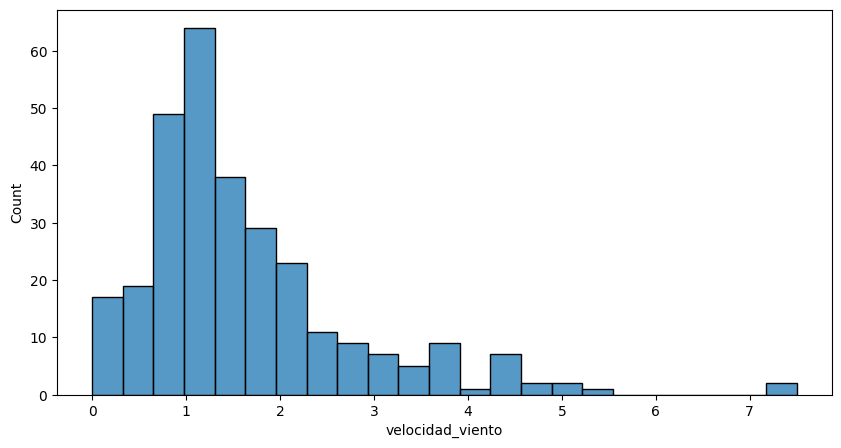

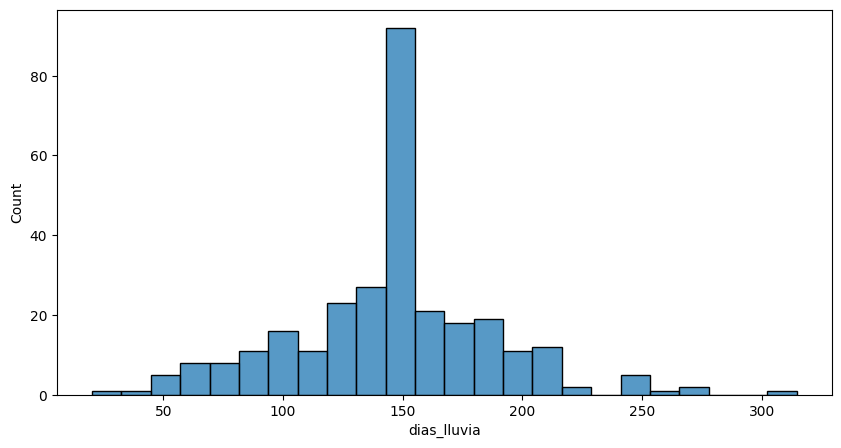

In [57]:
for col in df_climas.columns:
  plt.figure(figsize=(10, 5))
  sns.histplot(df_climas[col])


In [58]:
df_unificado2 = pd.merge(left = df_climas, right = energy, left_on='municipio', right_on= 'municipio', how='left')
df_unificado2

,municipio,velocidad_viento,dias_lluvia,potencia_m,energia_activa,energia_reactiva
0,ABRIAQUÍ,0.40000,200.60,NaN,NaN,NaN
1,ACANDÍ,1.10000,150.50,816.094078,357045.184466,127895.68932
2,ACEVEDO,1.72981,157.65,NaN,NaN,NaN
3,AGUACHICA,1.30000,92.60,NaN,NaN,NaN
4,AGUSTÍN CODAZZI,1.75000,77.95,NaN,NaN,NaN
...,...,...,...,...,...,...
290,YOLOMBÓ,1.50000,152.30,NaN,NaN,NaN
291,YOPAL,2.20000,149.60,NaN,NaN,NaN
292,ZETAQUIRÁ,1.00000,179.00,NaN,NaN,NaN
293,ZIPAQUIRÁ,2.25000,147.35,NaN,NaN,NaN


In [59]:
df_unificado2.isnull().sum()

,0
municipio,0
velocidad_viento,0
dias_lluvia,0
potencia_m,272
energia_activa,272
energia_reactiva,272


In [60]:
columns_to_fill = ['potencia_m','energia_activa','energia_reactiva']
df_unificado2.loc[:, columns_to_fill] = df_unificado2.loc[:, columns_to_fill].fillna(df1.loc[:, columns_to_fill].mean())
df_unificado2

,municipio,velocidad_viento,dias_lluvia,potencia_m,energia_activa,energia_reactiva
0,ABRIAQUÍ,0.40000,200.60,719.551306,371828.498479,110055.471123
1,ACANDÍ,1.10000,150.50,816.094078,357045.184466,127895.689320
2,ACEVEDO,1.72981,157.65,719.551306,371828.498479,110055.471123
3,AGUACHICA,1.30000,92.60,719.551306,371828.498479,110055.471123
4,AGUSTÍN CODAZZI,1.75000,77.95,719.551306,371828.498479,110055.471123
...,...,...,...,...,...,...
290,YOLOMBÓ,1.50000,152.30,719.551306,371828.498479,110055.471123
291,YOPAL,2.20000,149.60,719.551306,371828.498479,110055.471123
292,ZETAQUIRÁ,1.00000,179.00,719.551306,371828.498479,110055.471123
293,ZIPAQUIRÁ,2.25000,147.35,719.551306,371828.498479,110055.471123


In [61]:
df_unificado2.isnull().sum()

,0
municipio,0
velocidad_viento,0
dias_lluvia,0
potencia_m,0
energia_activa,0
energia_reactiva,0


In [62]:
df_viabilidad = df_unificado2
df_viabilidad

,municipio,velocidad_viento,dias_lluvia,potencia_m,energia_activa,energia_reactiva
0,ABRIAQUÍ,0.40000,200.60,719.551306,371828.498479,110055.471123
1,ACANDÍ,1.10000,150.50,816.094078,357045.184466,127895.689320
2,ACEVEDO,1.72981,157.65,719.551306,371828.498479,110055.471123
3,AGUACHICA,1.30000,92.60,719.551306,371828.498479,110055.471123
4,AGUSTÍN CODAZZI,1.75000,77.95,719.551306,371828.498479,110055.471123
...,...,...,...,...,...,...
290,YOLOMBÓ,1.50000,152.30,719.551306,371828.498479,110055.471123
291,YOPAL,2.20000,149.60,719.551306,371828.498479,110055.471123
292,ZETAQUIRÁ,1.00000,179.00,719.551306,371828.498479,110055.471123
293,ZIPAQUIRÁ,2.25000,147.35,719.551306,371828.498479,110055.471123


In [63]:
df_viabilidad.loc[:, 'viabilidad'] = ((df_viabilidad['dias_lluvia'] < 150) | (df_viabilidad['velocidad_viento'] > 3.5)) .astype(int)
df_viabilidad

,municipio,velocidad_viento,dias_lluvia,potencia_m,energia_activa,energia_reactiva,viabilidad
0,ABRIAQUÍ,0.40000,200.60,719.551306,371828.498479,110055.471123,0
1,ACANDÍ,1.10000,150.50,816.094078,357045.184466,127895.689320,0
2,ACEVEDO,1.72981,157.65,719.551306,371828.498479,110055.471123,0
3,AGUACHICA,1.30000,92.60,719.551306,371828.498479,110055.471123,1
4,AGUSTÍN CODAZZI,1.75000,77.95,719.551306,371828.498479,110055.471123,1
...,...,...,...,...,...,...,...
290,YOLOMBÓ,1.50000,152.30,719.551306,371828.498479,110055.471123,0
291,YOPAL,2.20000,149.60,719.551306,371828.498479,110055.471123,1
292,ZETAQUIRÁ,1.00000,179.00,719.551306,371828.498479,110055.471123,0
293,ZIPAQUIRÁ,2.25000,147.35,719.551306,371828.498479,110055.471123,1


In [69]:
df_viabilidad['municipio'].values

array(['ABRIAQUÍ', 'ACANDÍ', 'ACEVEDO', 'AGUACHICA', 'AGUSTÍN CODAZZI',
       'ALBANIA', 'ALCALÁ', 'ALDANA', 'ALGECIRAS',
       'ALTO BAUDÓ (PIE DE PATO)', 'AMBALEMA', 'ANAPOIMA', 'ANDES',
       'ANSERMANUEVO', 'ANZOÁTEGUI', 'APÍA', 'AQUITANIA', 'ARATOCA',
       'ARAUCA', 'ARGELIA', 'ARIGUANÍ (EL DIFICIL)', 'ARJONA', 'ARMENIA',
       'ATACO', 'AYAPEL', 'BAHÍA SOLANO (MUTIS)', 'BALBOA', 'BARAYA',
       'BARBACOAS', 'BARRANCABERMEJA', 'BARRANQUILLA', 'BELLO',
       'BELÉN DE UMBRÍA', 'BOGOTA, D.C', 'BOJAYÁ (BELLAVISTA)',
       'BUCARAMANGA', 'BUENAVENTURA', 'BUENAVISTA', 'BUGA', 'CABRERA',
       'CACHIPAY', 'CAICEDONIA', 'CAJAMARCA', 'CAJIBÍO', 'CALARCÁ',
       'CALI', 'CARCASÍ', 'CAREPA', 'CARMEN DEL DARIÉN  (CURBARADÓ)',
       'CARTAGENA', 'CARTAGO', 'CAÑASGORDAS', 'CERRITO', 'CHIGORODÓ',
       'CHINAVITA', 'CHINCHINA', 'CHINÁCOTA', 'CHITA', 'CIRCASIA',
       'CIUDAD BOLÍVAR', 'CIÉNAGA', 'COCORNÁ', 'COGUA', 'CONCORDIA',
       'CONFINES', 'CONSACÁ', 'CONTADERO', 'CONVENCIÓ

In [64]:
df_viabilidad['viabilidad'].value_counts()

,count
viabilidad,
1,204
0,91


<Axes: >

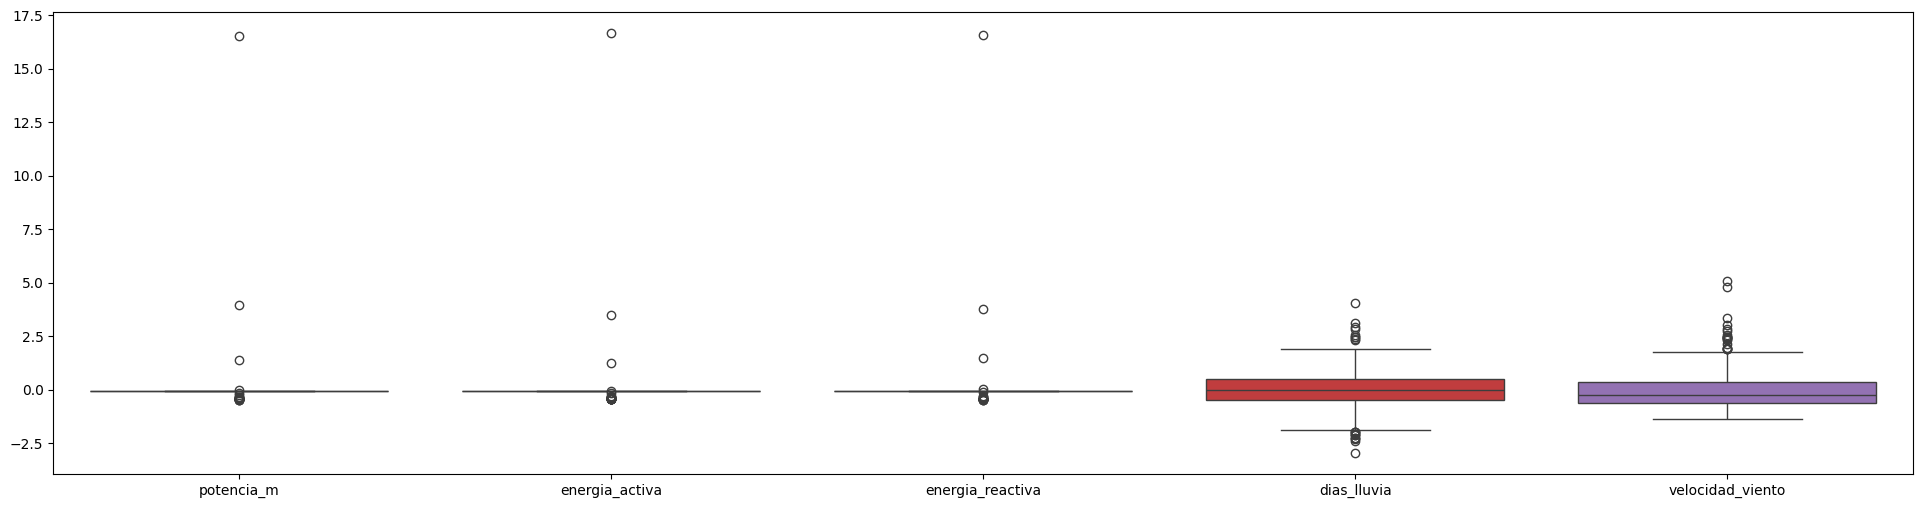

In [68]:
plt.figure(figsize=(24, 6))
variables = df_viabilidad[['potencia_m', 'energia_activa', 'energia_reactiva', 'dias_lluvia', 'velocidad_viento']]
sns.boxplot(variables)

In [70]:
from sklearn.preprocessing import RobustScaler, Normalizer, StandardScaler
escalador = StandardScaler()

columns_to_scale = ['potencia_m','dias_lluvia', 'energia_activa', 'energia_reactiva', 'velocidad_viento']
df_viabilidad.loc[:, columns_to_scale] = escalador.fit_transform(df_viabilidad.loc[:, columns_to_scale])
df_viabilidad

,municipio,velocidad_viento,dias_lluvia,potencia_m,energia_activa,energia_reactiva,viabilidad
0,ABRIAQUÍ,-1.048182,1.340671,-0.052241,-0.051391,-0.051858,0
1,ACANDÍ,-0.445110,0.143819,0.005538,-0.066633,0.016388,0
2,ACEVEDO,0.097491,0.314627,-0.052241,-0.051391,-0.051858,0
3,AGUACHICA,-0.272803,-1.239370,-0.052241,-0.051391,-0.051858,1
4,AGUSTÍN CODAZZI,0.114886,-1.589348,-0.052241,-0.051391,-0.051858,1
...,...,...,...,...,...,...,...
290,YOLOMBÓ,-0.100497,0.186820,-0.052241,-0.051391,-0.051858,0
291,YOPAL,0.502575,0.122318,-0.052241,-0.051391,-0.051858,1
292,ZETAQUIRÁ,-0.531263,0.824663,-0.052241,-0.051391,-0.051858,0
293,ZIPAQUIRÁ,0.545651,0.068568,-0.052241,-0.051391,-0.051858,1


<Axes: >

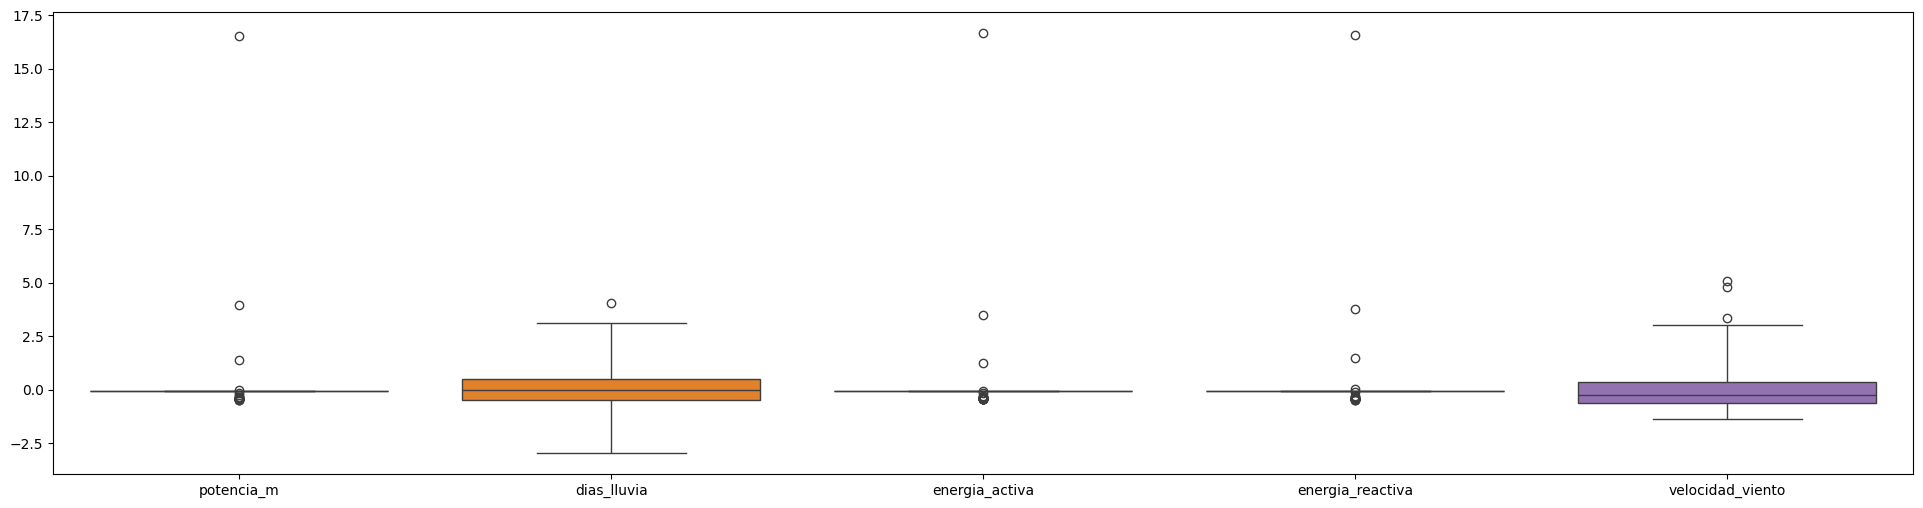

In [71]:
plt.figure(figsize=(24, 6))
vari = df_viabilidad[['potencia_m','dias_lluvia', 'energia_activa', 'energia_reactiva', 'velocidad_viento']]
sns.boxplot(vari, whis=3)

<Axes: >

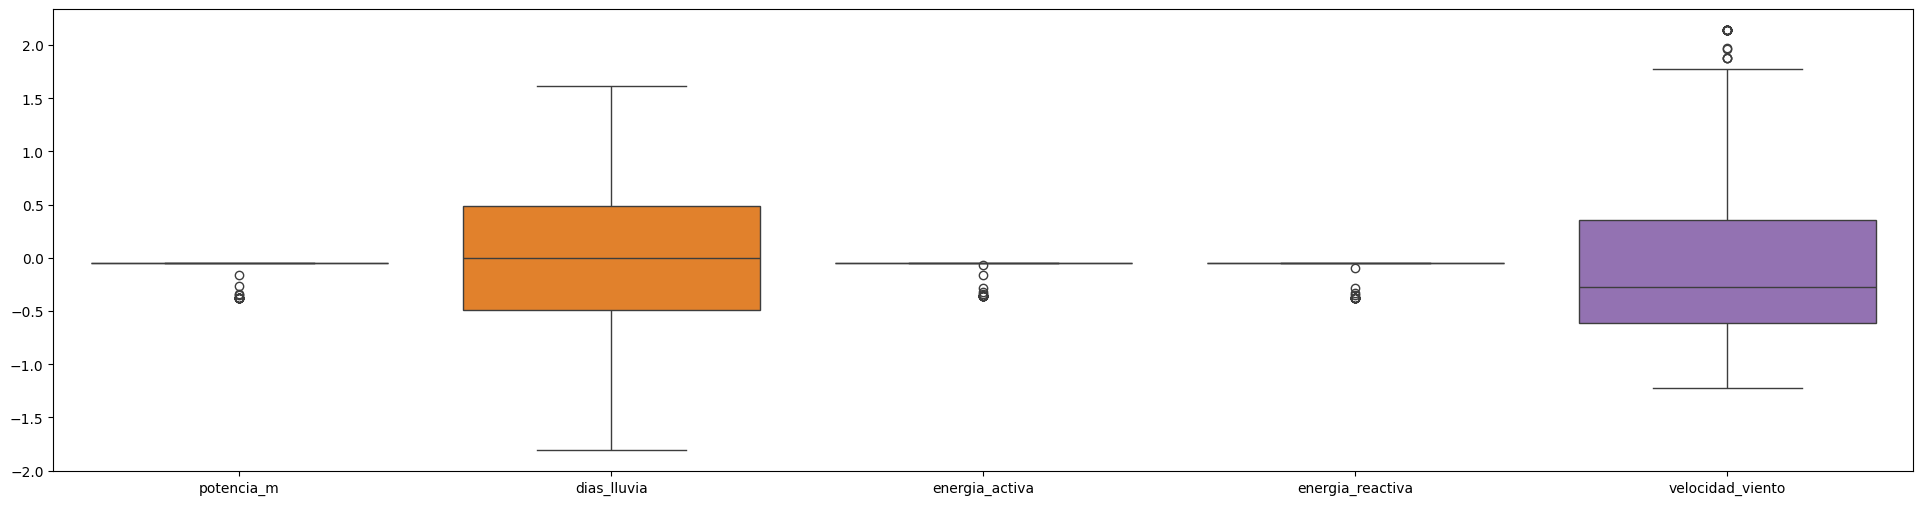

In [72]:
from scipy.stats.mstats import winsorize

variables_to_winzorize = ['dias_lluvia', 'energia_activa', 'energia_reactiva', 'potencia_m', 'velocidad_viento']

# Convert the selected columns to a NumPy array before applying winsorize
for var in variables_to_winzorize:
    df_viabilidad.loc[:, var] = winsorize(df_viabilidad.loc[:, var].values, limits=[0.05, 0.05])
    # .values extracts the underlying NumPy array from the Pandas Series

plt.figure(figsize=(24, 6))
v = df_viabilidad[['potencia_m','dias_lluvia', 'energia_activa', 'energia_reactiva', 'velocidad_viento']]
sns.boxplot(v)

<Axes: >

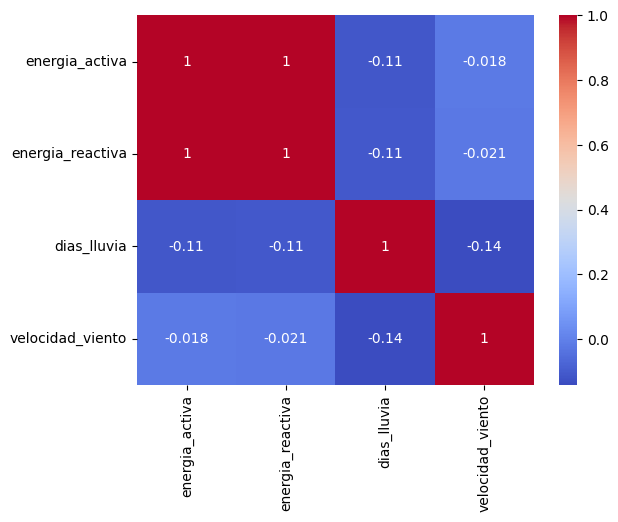

In [73]:
correlacion = df_viabilidad[['energia_activa', 'energia_reactiva','dias_lluvia', 'velocidad_viento']].corr()

sns.heatmap(correlacion, annot=True, cmap='coolwarm')

In [74]:
df_viabilidad

,municipio,velocidad_viento,dias_lluvia,potencia_m,energia_activa,energia_reactiva,viabilidad
0,ABRIAQUÍ,-1.048182,1.340671,-0.052241,-0.051391,-0.051858,0
1,ACANDÍ,-0.445110,0.143819,-0.052241,-0.066633,-0.051858,0
2,ACEVEDO,0.097491,0.314627,-0.052241,-0.051391,-0.051858,0
3,AGUACHICA,-0.272803,-1.239370,-0.052241,-0.051391,-0.051858,1
4,AGUSTÍN CODAZZI,0.114886,-1.589348,-0.052241,-0.051391,-0.051858,1
...,...,...,...,...,...,...,...
290,YOLOMBÓ,-0.100497,0.186820,-0.052241,-0.051391,-0.051858,0
291,YOPAL,0.502575,0.122318,-0.052241,-0.051391,-0.051858,1
292,ZETAQUIRÁ,-0.531263,0.824663,-0.052241,-0.051391,-0.051858,0
293,ZIPAQUIRÁ,0.545651,0.068568,-0.052241,-0.051391,-0.051858,1


# Modelo de clasificación NAIVE BAYES

In [ ]:
x = df_viabilidad[[ 'energia_activa', 'energia_reactiva', 'dias_lluvia', 'velocidad_viento']]
y = df_viabilidad['viabilidad']

x_entrenamiento, x_prueba, y_entrenamiento, y_prueba = train_test_split(x, y, test_size=0.2, random_state=42)

#Modelo
naive_model = BernoulliNB()
naive_model.fit(x_entrenamiento, y_entrenamiento)
predicciones = naive_model.predict(x_prueba)


#Evaluación del modelo
print(classification_report(y_prueba, predicciones,zero_division=1))
print('Accuracy:', accuracy_score(y_prueba, predicciones))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        20
           1       1.00      0.90      0.95        41

    accuracy                           0.93        61
   macro avg       0.92      0.95      0.93        61
weighted avg       0.95      0.93      0.94        61

Accuracy: 0.9344262295081968


In [ ]:
kfold1 = KFold(n_splits=3, shuffle=True, random_state=42)
cv_score1 = cross_val_score(naive_model, x, y, cv=kfold1)
print(cv_score1)
print(cv_score1.mean())

[0.92079208 0.95       0.98      ]
0.9502640264026403


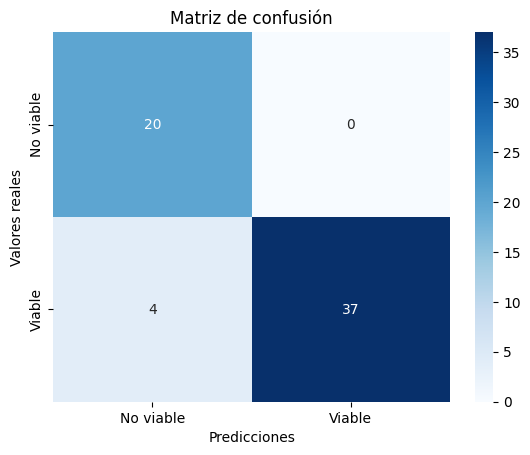

In [ ]:
matriz1 = confusion_matrix(y_prueba, predicciones)
labels = ['No viable', 'Viable']

sns.heatmap(matriz1, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de confusión')
plt.show()

In [ ]:
from sklearn.metrics import auc, roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_prueba, predicciones)
auc = roc_auc_score(y_prueba, predicciones)
print(f"AUC: {auc}")

AUC: 0.9512195121951219


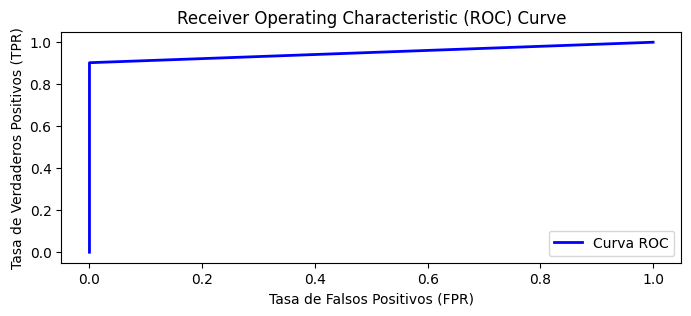

In [ ]:
plt.figure(figsize=(8, 3))
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC' % auc)


plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

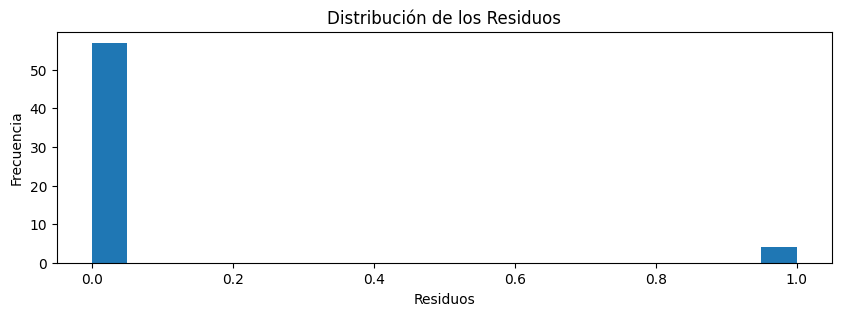

In [ ]:
plt.figure(figsize=(10, 3))
residuos = y_prueba - predicciones
plt.hist(residuos, bins=20)
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Distribución de los Residuos")
plt.show()